In [56]:
import tweepy
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt

# To split the data as necessary for modelling
from sklearn.model_selection import train_test_split

# To build a simple model
from sklearn.linear_model import LogisticRegression

# To get rid of logistic regression default solver warnings that appear if sklearn hasn't been updated
import warnings
warnings.filterwarnings('ignore')

# To "pickle" things, like accuracies or even an entire fitted model
import joblib

# To cross-validate
from sklearn.model_selection import cross_val_score

# To try scaling the data in various ways
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler

# To try dimensionality reduction
from sklearn.decomposition import PCA

# To do a cross-validated grid search
from sklearn.model_selection import GridSearchCV


In [2]:
# Authenticate to Twitter
auth = tweepy.OAuthHandler("OENDOLh2rnnwsUKOO6XO1WED9", 
    "opxleI1SC7wrCLDZpQXWpoDhL2ntNXvv7fSx09OiQnh9rqWStd")
auth.set_access_token("1292145515925307393-YT3Bg347EwCst3XgRS43EtLM7i9B8l", 
    "VvX4ikUwSukdZzUMyMCYa4tUM4He4craOxZXDAb5BtSDK")

api = tweepy.API(auth)

try:
    api.verify_credentials()
    print("Authentication OK")
except:
    print("Error during authentication")

Authentication OK


In [3]:
# Setting notifier for hitting the wait limit
api = tweepy.API(auth, wait_on_rate_limit=True,
    wait_on_rate_limit_notify=True)

In [6]:
# Pulling some tweets to test how extended mode works and looking at the different tweet objects
username = {'realDonaldTrump','michellemalkin'}
count = 10
test_list = []
for user in username:
    tweets = tweepy.Cursor(api.user_timeline,id=user, include_rts = True, tweet_mode = 'extended').items(count)
    tweets_list = [[tweet.created_at, tweet.full_text, tweet.entities , user, 1] for tweet in tweets]
    test_list.extend(tweets_list)
    

In [7]:
# Creating a dataframe with the lists
pd.DataFrame(test_list)

,0,1,2,3,4
0,2020-09-12 22:12:07,RT @dbongino: Kamala Still Hasn't Deleted Twee...,"{'hashtags': [], 'symbols': [], 'user_mentions...",realDonaldTrump,1
1,2020-09-12 22:08:56,Hispanics seem to be strongly favoring Preside...,"{'hashtags': [], 'symbols': [], 'user_mentions...",realDonaldTrump,1
2,2020-09-12 22:05:41,"On my way, Nevada!","{'hashtags': [], 'symbols': [], 'user_mentions...",realDonaldTrump,1
3,2020-09-12 22:03:59,"RT @realDonaldTrump: See you tonight Minden, N...","{'hashtags': [{'text': 'MAGA', 'indices': [69,...",realDonaldTrump,1
4,2020-09-12 22:00:28,RT @LindseyGrahamSC: This agreement sets the M...,"{'hashtags': [], 'symbols': [], 'user_mentions...",realDonaldTrump,1
5,2020-09-12 22:00:10,RT @LindseyGrahamSC: What incredible times we ...,"{'hashtags': [], 'symbols': [], 'user_mentions...",realDonaldTrump,1
6,2020-09-12 21:59:21,Fake Liberal Democrat Donors. Money laundering...,"{'hashtags': [], 'symbols': [], 'user_mentions...",realDonaldTrump,1
7,2020-09-12 21:50:07,Chicago‘s Fraternal Order of Police Endorses D...,"{'hashtags': [], 'symbols': [], 'user_mentions...",realDonaldTrump,1
8,2020-09-12 21:37:16,“Mail-Vote Madness in Pennsylvania - The swing...,"{'hashtags': [], 'symbols': [], 'user_mentions...",realDonaldTrump,1
9,2020-09-12 21:13:44,"Join me tomorrow night in Henderson, Nevada! #...","{'hashtags': [{'text': 'MAGA', 'indices': [45,...",realDonaldTrump,1


In [8]:
# Pulling a test string for cleaning tests
test = test_list[0]

In [9]:
# Pulling out the tweet.attributes object
test2 = test[1]

In [10]:
# setting an option to display the full tweet without the "..."
pd.set_option('display.max_colwidth', None)

In [11]:
# Looking at the tweet.attributes object
print(test[2])

{'hashtags': [], 'symbols': [], 'user_mentions': [{'screen_name': 'dbongino', 'name': 'Dan Bongino', 'id': 232901331, 'id_str': '232901331', 'indices': [3, 12]}], 'urls': [{'url': 'https://t.co/8OBGHASHoE', 'expanded_url': 'https://bongino.com/kamala-continues-supporting-bail-fund-that-has-helped-rioters', 'display_url': 'bongino.com/kamala-continu…', 'indices': [94, 117]}]}


Well, this was a useless object, we will definetely not be using it

In [12]:
# Printing a test tweet to see if we get the full tweet without the "..."
print(test[1])

RT @dbongino: Kamala Still Hasn't Deleted Tweet Supporting Bail Fund That Helped Rioters 👇🏻👇🏻 https://t.co/8OBGHASHoE


In [18]:
# Pulling the Republican tweets and assigning them a value of 1 in our target column

username = {'GOPLeader','SteveScalise','Jim_Jordan','RandPaul','GOP','Mike_Pence','MarshaBlackburn',
           'tedcruz','marcorubio','DanCrenshawTX','LindseyGrahamSC'}
count = 500
total_list = []
for user in username:
    tweets = tweepy.Cursor(api.user_timeline,id=user, include_rts = True, tweet_mode = 'extended').items(count)
    tweets_list = [[tweet.created_at, tweet.full_text, user, 1] for tweet in tweets]
    total_list.extend(tweets_list)

In [19]:
# Pulling the Democratic tweets and assigning them a value of 0 in our target column

username = {'BernieSanders','JoeBiden','ewarren','PeteButtigieg',
           'KamalaHarris','JohnDelaney','amyklobuchar', 'MichaelBennet', 'AOC', 'SpeakerPelosi','TheDemocrats'}
count = 500
for user in username:
    tweets = tweepy.Cursor(api.user_timeline,id=user, include_rts = True, tweet_mode = 'extended').items(count)
    tweets_list = [[tweet.created_at, tweet.full_text, user, 0] for tweet in tweets]
    total_list.extend(tweets_list)
    

Rate limit reached. Sleeping for: 76


Must have read 200-300 articles to come up with above lists of accounts.

Some notes for politicians that were considered but omitted because they would act as outliers:

Taking out bloomberg since hes got his foot in both camps and might add noise.

Dont think we should include Trump because there is just too much noise inconsistencies would add. His tweets are on a wide spectrum of things. When trump speaks you just get what comes out of his mouth.

Mitt Romney was considered but he was the first to break away from trump so he was a special litmus test for other republicans who jumped ship and so we will not include him.

Tulsi Gabbard - opportunist and flip flopper so she was taken out as well. Bandwagoners might throw off the model. Hasnt made her poisition fully solid either.

In [20]:
# Turning the scrape into a dataframe and taking a look
df1 = pd.DataFrame(total_list)

In [22]:
df1

,0,1,2,3
0,2020-09-12 21:56:57,"RT @rpof_gamble: Rain🌧 or Shine🌞, Raquel &amp; I are hitting doors for @realDonaldTrump in Hialeah today😃🇺🇸! #Cat5Calvary #LeadRight https://t.…",GOP,1
1,2020-09-12 21:55:09,RT @mfreckletonGOP: The road to November continues! Team @JohnJamesMI and #TVMI20 continuing to talk to voters across the state. Michigan i…,GOP,1
2,2020-09-12 21:54:40,RT @oliviaintheusa: Trump Victory Fellow &amp; Campus Team Leader Carson is teaching his classmate Caleb how to canvas with @SidekickHQ for Rep…,GOP,1
3,2020-09-12 21:53:56,RT @EliseStefanik: HUGE enthusiasm for @realDonaldTrump at our @TeamTrump Rally in Cambridge #NY21! \n\nThe North Country is Trump and Elise…,GOP,1
4,2020-09-12 21:52:12,"RT @sukyeesmith: Incredible #VeteransForTrump and #SportsmenforTrump blessed to hear from @JohnTiegen and Congressman Perry at Harrisburg,…",GOP,1
...,...,...,...,...
10995,2020-08-07 13:04:00,"While this president only cares about the rich and big corporations, @JoeBiden envisions an America that works for everyone. That’s why compassion and equity are at the heart of Joe’s campaign.",TheDemocrats,0
10996,2020-08-07 02:57:00,"RT @DemConvention: If we want to truly honor the legacy of John Lewis, we will do everything in our power to restore and strengthen the Vot…",TheDemocrats,0
10997,2020-08-07 01:57:00,"Trump failed to take decisive action against this public health and economic crisis, leaving Americans without support as millions lost their jobs and thousands lost their lives. Unlike Trump, @JoeBiden has a plan to combat this pandemic and prepare us for future health threats.",TheDemocrats,0
10998,2020-08-07 00:57:00,RT @JoeBiden: The fight for civil rights is what drove me to get involved in politics in the first place. It's why I fought for and helped…,TheDemocrats,0


In [27]:
# Checking Distribution
df1[3].value_counts()

1    5500
0    5500
Name: 3, dtype: int64

In [40]:
# Renaming columns and checking
df1 = df1.rename(columns = {0 : 'Timestamp of Tweet', 1 : 'Tweet Text', 2 : 'Twitter Handle', 3: 'Is Republican'})

In [41]:

df1

,Timestamp of Tweet,Tweet Text,Twitter Handle,Is Republican
0,2020-09-12 21:56:57,"RT @rpof_gamble: Rain🌧 or Shine🌞, Raquel &amp; I are hitting doors for @realDonaldTrump in Hialeah today😃🇺🇸! #Cat5Calvary #LeadRight https://t.…",GOP,1
1,2020-09-12 21:55:09,RT @mfreckletonGOP: The road to November continues! Team @JohnJamesMI and #TVMI20 continuing to talk to voters across the state. Michigan i…,GOP,1
2,2020-09-12 21:54:40,RT @oliviaintheusa: Trump Victory Fellow &amp; Campus Team Leader Carson is teaching his classmate Caleb how to canvas with @SidekickHQ for Rep…,GOP,1
3,2020-09-12 21:53:56,RT @EliseStefanik: HUGE enthusiasm for @realDonaldTrump at our @TeamTrump Rally in Cambridge #NY21! \n\nThe North Country is Trump and Elise…,GOP,1
4,2020-09-12 21:52:12,"RT @sukyeesmith: Incredible #VeteransForTrump and #SportsmenforTrump blessed to hear from @JohnTiegen and Congressman Perry at Harrisburg,…",GOP,1
...,...,...,...,...
10995,2020-08-07 13:04:00,"While this president only cares about the rich and big corporations, @JoeBiden envisions an America that works for everyone. That’s why compassion and equity are at the heart of Joe’s campaign.",TheDemocrats,0
10996,2020-08-07 02:57:00,"RT @DemConvention: If we want to truly honor the legacy of John Lewis, we will do everything in our power to restore and strengthen the Vot…",TheDemocrats,0
10997,2020-08-07 01:57:00,"Trump failed to take decisive action against this public health and economic crisis, leaving Americans without support as millions lost their jobs and thousands lost their lives. Unlike Trump, @JoeBiden has a plan to combat this pandemic and prepare us for future health threats.",TheDemocrats,0
10998,2020-08-07 00:57:00,RT @JoeBiden: The fight for civil rights is what drove me to get involved in politics in the first place. It's why I fought for and helped…,TheDemocrats,0


In [42]:
# Saving to a CSV file so we dont have to scrape again for analysis in other books
df1.to_csv('TwitterDataScrape.csv')

In [43]:
# Checking columns
df1.columns

Index(['Timestamp of Tweet', 'Tweet Text', 'Twitter Handle', 'Is Republican'], dtype='object')

In [46]:
# Realized we wont need timestamps either so dropping that column
dfnlp = df1.drop('Timestamp of Tweet', axis = 1)

In [47]:
# Check
dfnlp

,Tweet Text,Twitter Handle,Is Republican
0,"RT @rpof_gamble: Rain🌧 or Shine🌞, Raquel &amp; I are hitting doors for @realDonaldTrump in Hialeah today😃🇺🇸! #Cat5Calvary #LeadRight https://t.…",GOP,1
1,RT @mfreckletonGOP: The road to November continues! Team @JohnJamesMI and #TVMI20 continuing to talk to voters across the state. Michigan i…,GOP,1
2,RT @oliviaintheusa: Trump Victory Fellow &amp; Campus Team Leader Carson is teaching his classmate Caleb how to canvas with @SidekickHQ for Rep…,GOP,1
3,RT @EliseStefanik: HUGE enthusiasm for @realDonaldTrump at our @TeamTrump Rally in Cambridge #NY21! \n\nThe North Country is Trump and Elise…,GOP,1
4,"RT @sukyeesmith: Incredible #VeteransForTrump and #SportsmenforTrump blessed to hear from @JohnTiegen and Congressman Perry at Harrisburg,…",GOP,1
...,...,...,...
10995,"While this president only cares about the rich and big corporations, @JoeBiden envisions an America that works for everyone. That’s why compassion and equity are at the heart of Joe’s campaign.",TheDemocrats,0
10996,"RT @DemConvention: If we want to truly honor the legacy of John Lewis, we will do everything in our power to restore and strengthen the Vot…",TheDemocrats,0
10997,"Trump failed to take decisive action against this public health and economic crisis, leaving Americans without support as millions lost their jobs and thousands lost their lives. Unlike Trump, @JoeBiden has a plan to combat this pandemic and prepare us for future health threats.",TheDemocrats,0
10998,RT @JoeBiden: The fight for civil rights is what drove me to get involved in politics in the first place. It's why I fought for and helped…,TheDemocrats,0


In [50]:
# Creating dummy variables for the Twitter Handles to see if we can get some information from the handles themselves
handledummies = pd.get_dummies(dfnlp['Twitter Handle'])
handledummies

,AOC,BernieSanders,DanCrenshawTX,GOP,GOPLeader,Jim_Jordan,JoeBiden,JohnDelaney,KamalaHarris,LindseyGrahamSC,...,Mike_Pence,PeteButtigieg,RandPaul,SpeakerPelosi,SteveScalise,TheDemocrats,amyklobuchar,ewarren,marcorubio,tedcruz
0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
10996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
10997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
10998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [51]:
# Dropping the speaker of the house since I think coeffecient analysis wise, the speaker of the house can be ignored
# Was also reading that when we will be doing regularization in SKlearn this might not matter so we 
# might choose to add her back in
handledummies.drop('SpeakerPelosi',axis = 1, inplace= True)
handledummies

,AOC,BernieSanders,DanCrenshawTX,GOP,GOPLeader,Jim_Jordan,JoeBiden,JohnDelaney,KamalaHarris,LindseyGrahamSC,...,MichaelBennet,Mike_Pence,PeteButtigieg,RandPaul,SteveScalise,TheDemocrats,amyklobuchar,ewarren,marcorubio,tedcruz
0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
10996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
10997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
10998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [52]:
# Concatenating back to the original dataframe
dfnlp2 = pd.concat([dfnlp, handledummies], axis = 1)

In [53]:
# Check
dfnlp2

,Tweet Text,Twitter Handle,Is Republican,AOC,BernieSanders,DanCrenshawTX,GOP,GOPLeader,Jim_Jordan,JoeBiden,...,MichaelBennet,Mike_Pence,PeteButtigieg,RandPaul,SteveScalise,TheDemocrats,amyklobuchar,ewarren,marcorubio,tedcruz
0,"RT @rpof_gamble: Rain🌧 or Shine🌞, Raquel &amp; I are hitting doors for @realDonaldTrump in Hialeah today😃🇺🇸! #Cat5Calvary #LeadRight https://t.…",GOP,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,RT @mfreckletonGOP: The road to November continues! Team @JohnJamesMI and #TVMI20 continuing to talk to voters across the state. Michigan i…,GOP,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,RT @oliviaintheusa: Trump Victory Fellow &amp; Campus Team Leader Carson is teaching his classmate Caleb how to canvas with @SidekickHQ for Rep…,GOP,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,RT @EliseStefanik: HUGE enthusiasm for @realDonaldTrump at our @TeamTrump Rally in Cambridge #NY21! \n\nThe North Country is Trump and Elise…,GOP,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,"RT @sukyeesmith: Incredible #VeteransForTrump and #SportsmenforTrump blessed to hear from @JohnTiegen and Congressman Perry at Harrisburg,…",GOP,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10995,"While this president only cares about the rich and big corporations, @JoeBiden envisions an America that works for everyone. That’s why compassion and equity are at the heart of Joe’s campaign.",TheDemocrats,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
10996,"RT @DemConvention: If we want to truly honor the legacy of John Lewis, we will do everything in our power to restore and strengthen the Vot…",TheDemocrats,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
10997,"Trump failed to take decisive action against this public health and economic crisis, leaving Americans without support as millions lost their jobs and thousands lost their lives. Unlike Trump, @JoeBiden has a plan to combat this pandemic and prepare us for future health threats.",TheDemocrats,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
10998,RT @JoeBiden: The fight for civil rights is what drove me to get involved in politics in the first place. It's why I fought for and helped…,TheDemocrats,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [54]:
# Dropping the column we dont need now that we have the dummy variables
dfnlp2.drop('Twitter Handle',axis = 1, inplace = True)

In [55]:
# Check
dfnlp2

,Tweet Text,Is Republican,AOC,BernieSanders,DanCrenshawTX,GOP,GOPLeader,Jim_Jordan,JoeBiden,JohnDelaney,...,MichaelBennet,Mike_Pence,PeteButtigieg,RandPaul,SteveScalise,TheDemocrats,amyklobuchar,ewarren,marcorubio,tedcruz
0,"RT @rpof_gamble: Rain🌧 or Shine🌞, Raquel &amp; I are hitting doors for @realDonaldTrump in Hialeah today😃🇺🇸! #Cat5Calvary #LeadRight https://t.…",1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,RT @mfreckletonGOP: The road to November continues! Team @JohnJamesMI and #TVMI20 continuing to talk to voters across the state. Michigan i…,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,RT @oliviaintheusa: Trump Victory Fellow &amp; Campus Team Leader Carson is teaching his classmate Caleb how to canvas with @SidekickHQ for Rep…,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,RT @EliseStefanik: HUGE enthusiasm for @realDonaldTrump at our @TeamTrump Rally in Cambridge #NY21! \n\nThe North Country is Trump and Elise…,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,"RT @sukyeesmith: Incredible #VeteransForTrump and #SportsmenforTrump blessed to hear from @JohnTiegen and Congressman Perry at Harrisburg,…",1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10995,"While this president only cares about the rich and big corporations, @JoeBiden envisions an America that works for everyone. That’s why compassion and equity are at the heart of Joe’s campaign.",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
10996,"RT @DemConvention: If we want to truly honor the legacy of John Lewis, we will do everything in our power to restore and strengthen the Vot…",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
10997,"Trump failed to take decisive action against this public health and economic crisis, leaving Americans without support as millions lost their jobs and thousands lost their lives. Unlike Trump, @JoeBiden has a plan to combat this pandemic and prepare us for future health threats.",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
10998,RT @JoeBiden: The fight for civil rights is what drove me to get involved in politics in the first place. It's why I fought for and helped…,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [62]:
# pulling out a test string to do cleaning testing

test_string = dfnlp2.iloc[0,0]
test_string

'RT @rpof_gamble: Rain🌧 or Shine🌞, Raquel &amp; I are hitting doors for @realDonaldTrump in Hialeah today😃🇺🇸! #Cat5Calvary #LeadRight https://t.…'

Stuff to clean:

HTML waste

Emotes/Emojis

"RT @person:"

Hyperlinks at end

In [79]:
# Beautiful Soup to clean HTML waste
from bs4 import BeautifulSoup
souper = BeautifulSoup(test_string, 'lxml')
xmldel=souper.get_text()
xmldel

'RT @rpof_gamble: Rain🌧 or Shine🌞, Raquel & I are hitting doors for @realDonaldTrump in Hialeah today😃🇺🇸! #Cat5Calvary #LeadRight https://t.…'

In [66]:
import re

In [80]:
# Trying to use regex to clean out the "RT @person"
rtdel1 = re.sub(r"^RT @.*:","",xmldel)

In [81]:
rtdel1

'//t.…'

This failed spectacularly as it deleted everything from RT to the ":" in the hyperlink at the end. CUE Facepalm. Let's clean out the link first.

In [82]:
# Cleaning out the link using regex
urldel1 = re.sub('https?://[A-Za-z0-9./]+','',xmldel)

In [83]:
urldel1

'RT @rpof_gamble: Rain🌧 or Shine🌞, Raquel & I are hitting doors for @realDonaldTrump in Hialeah today😃🇺🇸! #Cat5Calvary #LeadRight …'

In [84]:
# Trying the "RT @ person" clean AFTER cleaning out the hyperlink
rtdel2 = re.sub(r"^RT @.*:","",urldel1)

In [85]:
rtdel2

' Rain🌧 or Shine🌞, Raquel & I are hitting doors for @realDonaldTrump in Hialeah today😃🇺🇸! #Cat5Calvary #LeadRight …'

This works! However this is where I discovered the Tweet Preprocessor Library. Lets try it!

In [90]:
import preprocessor as p
kmsifthisworks = p.clean(xmldel)
kmsifthisworks

'RT : Rain or Shine, Raquel & I are hitting doors for in Hialeah today! #Cat5Calvary #LeadRight .'

SKUJHFDKUSHDJHSODIHOISHDOIJSDOIJSOIDJOISJOIGFBHSHFDHSIDP. ALL those hours of work just so that a library can do it better in minutes - I must be a data scientist.

In [96]:
#Keeping reserved words and hashtags and optimizing the Preprocessor library
p.set_options(p.OPT.URL, p.OPT.EMOJI, p.OPT.MENTION, p.OPT.SMILEY, p.OPT.NUMBER)
plswork = p.clean(rtdel2)
plswork

'Rain or Shine, Raquel & I are hitting doors for in Hialeah today! #Cat5Calvary #LeadRight'

In [102]:
# Checking to make sure there are no nulls and checking data types
dfnlp2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11000 entries, 0 to 10999
Data columns (total 23 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Tweet Text       11000 non-null  string
 1   Is Republican    11000 non-null  int64 
 2   AOC              11000 non-null  uint8 
 3   BernieSanders    11000 non-null  uint8 
 4   DanCrenshawTX    11000 non-null  uint8 
 5   GOP              11000 non-null  uint8 
 6   GOPLeader        11000 non-null  uint8 
 7   Jim_Jordan       11000 non-null  uint8 
 8   JoeBiden         11000 non-null  uint8 
 9   JohnDelaney      11000 non-null  uint8 
 10  KamalaHarris     11000 non-null  uint8 
 11  LindseyGrahamSC  11000 non-null  uint8 
 12  MarshaBlackburn  11000 non-null  uint8 
 13  MichaelBennet    11000 non-null  uint8 
 14  Mike_Pence       11000 non-null  uint8 
 15  PeteButtigieg    11000 non-null  uint8 
 16  RandPaul         11000 non-null  uint8 
 17  SteveScalise     11000 non-null

In [101]:
# Turning the text column into datatype string 
dfnlp2['Tweet Text'] = dfnlp2['Tweet Text'].astype('string')

In [108]:
# Running a loop to run the first part of cleaning - HTML waste
preplist1 = []
for text in dfnlp2['Tweet Text']:
    souper2 = BeautifulSoup(text, "lxml")
    preplist1.append(souper2.get_text())

In [110]:
# Instantiating a new column for the new version of the cleaned tweets
dfnlp2['Tweet Text P1']= preplist1

In [112]:
# Check to see if new column added
dfnlp2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11000 entries, 0 to 10999
Data columns (total 24 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Tweet Text       11000 non-null  string
 1   Is Republican    11000 non-null  int64 
 2   AOC              11000 non-null  uint8 
 3   BernieSanders    11000 non-null  uint8 
 4   DanCrenshawTX    11000 non-null  uint8 
 5   GOP              11000 non-null  uint8 
 6   GOPLeader        11000 non-null  uint8 
 7   Jim_Jordan       11000 non-null  uint8 
 8   JoeBiden         11000 non-null  uint8 
 9   JohnDelaney      11000 non-null  uint8 
 10  KamalaHarris     11000 non-null  uint8 
 11  LindseyGrahamSC  11000 non-null  uint8 
 12  MarshaBlackburn  11000 non-null  uint8 
 13  MichaelBennet    11000 non-null  uint8 
 14  Mike_Pence       11000 non-null  uint8 
 15  PeteButtigieg    11000 non-null  uint8 
 16  RandPaul         11000 non-null  uint8 
 17  SteveScalise     11000 non-null

In [114]:
# Turning new column back into a string
dfnlp2['Tweet Text P1'] = dfnlp2['Tweet Text P1'].astype('string')

In [116]:
# Check
dfnlp2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11000 entries, 0 to 10999
Data columns (total 24 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Tweet Text       11000 non-null  string
 1   Is Republican    11000 non-null  int64 
 2   AOC              11000 non-null  uint8 
 3   BernieSanders    11000 non-null  uint8 
 4   DanCrenshawTX    11000 non-null  uint8 
 5   GOP              11000 non-null  uint8 
 6   GOPLeader        11000 non-null  uint8 
 7   Jim_Jordan       11000 non-null  uint8 
 8   JoeBiden         11000 non-null  uint8 
 9   JohnDelaney      11000 non-null  uint8 
 10  KamalaHarris     11000 non-null  uint8 
 11  LindseyGrahamSC  11000 non-null  uint8 
 12  MarshaBlackburn  11000 non-null  uint8 
 13  MichaelBennet    11000 non-null  uint8 
 14  Mike_Pence       11000 non-null  uint8 
 15  PeteButtigieg    11000 non-null  uint8 
 16  RandPaul         11000 non-null  uint8 
 17  SteveScalise     11000 non-null

In [117]:
# Running a loop to run the Second part of cleaning - Hyperlink and emoticons
preplist2 =[]
for text in dfnlp2['Tweet Text P1']:
    preplist2.append(p.clean(text))

In [118]:
# Instantiating a new column for the new version of the cleaned tweets
dfnlp2['Tweet Text P2']= preplist2

In [119]:
# Check
dfnlp2

,Tweet Text,Is Republican,AOC,BernieSanders,DanCrenshawTX,GOP,GOPLeader,Jim_Jordan,JoeBiden,JohnDelaney,...,PeteButtigieg,RandPaul,SteveScalise,TheDemocrats,amyklobuchar,ewarren,marcorubio,tedcruz,Tweet Text P1,Tweet Text P2
0,"RT @rpof_gamble: Rain🌧 or Shine🌞, Raquel &amp; I are hitting doors for @realDonaldTrump in Hialeah today😃🇺🇸! #Cat5Calvary #LeadRight https://t.…",1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,"RT @rpof_gamble: Rain🌧 or Shine🌞, Raquel & I are hitting doors for @realDonaldTrump in Hialeah today😃🇺🇸! #Cat5Calvary #LeadRight https://t.…","RT : Rain or Shine, Raquel & I are hitting doors for in Hialeah today! #Cat5Calvary #LeadRight ."
1,RT @mfreckletonGOP: The road to November continues! Team @JohnJamesMI and #TVMI20 continuing to talk to voters across the state. Michigan i…,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,RT @mfreckletonGOP: The road to November continues! Team @JohnJamesMI and #TVMI20 continuing to talk to voters across the state. Michigan i…,RT : The road to November continues! Team and #TVMI20 continuing to talk to voters across the state. Michigan i
2,RT @oliviaintheusa: Trump Victory Fellow &amp; Campus Team Leader Carson is teaching his classmate Caleb how to canvas with @SidekickHQ for Rep…,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,RT @oliviaintheusa: Trump Victory Fellow & Campus Team Leader Carson is teaching his classmate Caleb how to canvas with @SidekickHQ for Rep…,RT : Trump Victory Fellow & Campus Team Leader Carson is teaching his classmate Caleb how to canvas with for Rep
3,RT @EliseStefanik: HUGE enthusiasm for @realDonaldTrump at our @TeamTrump Rally in Cambridge #NY21! The North Country is Trump and Elise…,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,RT @EliseStefanik: HUGE enthusiasm for @realDonaldTrump at our @TeamTrump Rally in Cambridge #NY21! The North Country is Trump and Elise…,RT : HUGE enthusiasm for at our Rally in Cambridge #NY21! The North Country is Trump and Elise
4,"RT @sukyeesmith: Incredible #VeteransForTrump and #SportsmenforTrump blessed to hear from @JohnTiegen and Congressman Perry at Harrisburg,…",1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,"RT @sukyeesmith: Incredible #VeteransForTrump and #SportsmenforTrump blessed to hear from @JohnTiegen and Congressman Perry at Harrisburg,…","RT : Incredible #VeteransForTrump and #SportsmenforTrump blessed to hear from and Congressman Perry at Harrisburg,"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10995,"While this president only cares about the rich and big corporations, @JoeBiden envisions an America that works for everyone. That’s why compassion and equity are at the heart of Joe’s campaign.",0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,"While this president only cares about the rich and big corporations, @JoeBiden envisions an America that works for everyone. That’s why compassion and equity are at the heart of Joe’s campaign.","While this president only cares about the rich and big corporations, envisions an America that works for everyone. Thats why compassion and equity are at the heart of Joes campaign."
10996,"RT @DemConvention: If we want to truly honor the legacy of John Lewis, we will do everything in our power to restore and strengthen the Vot…",0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,"RT @DemConvention: If we want to truly honor the legacy of John Lewis, we will do everything in our power to restore and strengthen the Vot…","RT : If we want to truly honor the legacy of John Lewis, we will do everything in our power to restore and strengthen the Vot"
10997,"Trump failed to take decisive action against this public health and economic crisis, leaving Americans without support as millions lost their jobs and thousands lost their lives. Unlike Trump, @JoeBiden has a plan to combat this pandemic and prepare us for future health threats.",0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,"Trump failed to take decisive action against this public health and economic crisis, leaving Americans without support as millio

In [124]:
# Running a loop to run the final part of cleaning - "RT @person:"
preplist3 =[]
for text in dfnlp2['Tweet Text P2']:
    preplist3.append(re.sub(r"^RT.*:","",text))

In [125]:
# Instantiating a new column for the new version of the cleaned tweets
dfnlp2['Tweet Text P3']= preplist3
dfnlp2

,Tweet Text,Is Republican,AOC,BernieSanders,DanCrenshawTX,GOP,GOPLeader,Jim_Jordan,JoeBiden,JohnDelaney,...,RandPaul,SteveScalise,TheDemocrats,amyklobuchar,ewarren,marcorubio,tedcruz,Tweet Text P1,Tweet Text P2,Tweet Text P3
0,"RT @rpof_gamble: Rain🌧 or Shine🌞, Raquel &amp; I are hitting doors for @realDonaldTrump in Hialeah today😃🇺🇸! #Cat5Calvary #LeadRight https://t.…",1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,"RT @rpof_gamble: Rain🌧 or Shine🌞, Raquel & I are hitting doors for @realDonaldTrump in Hialeah today😃🇺🇸! #Cat5Calvary #LeadRight https://t.…","RT : Rain or Shine, Raquel & I are hitting doors for in Hialeah today! #Cat5Calvary #LeadRight .","Rain or Shine, Raquel & I are hitting doors for in Hialeah today! #Cat5Calvary #LeadRight ."
1,RT @mfreckletonGOP: The road to November continues! Team @JohnJamesMI and #TVMI20 continuing to talk to voters across the state. Michigan i…,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,RT @mfreckletonGOP: The road to November continues! Team @JohnJamesMI and #TVMI20 continuing to talk to voters across the state. Michigan i…,RT : The road to November continues! Team and #TVMI20 continuing to talk to voters across the state. Michigan i,The road to November continues! Team and #TVMI20 continuing to talk to voters across the state. Michigan i
2,RT @oliviaintheusa: Trump Victory Fellow &amp; Campus Team Leader Carson is teaching his classmate Caleb how to canvas with @SidekickHQ for Rep…,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,RT @oliviaintheusa: Trump Victory Fellow & Campus Team Leader Carson is teaching his classmate Caleb how to canvas with @SidekickHQ for Rep…,RT : Trump Victory Fellow & Campus Team Leader Carson is teaching his classmate Caleb how to canvas with for Rep,Trump Victory Fellow & Campus Team Leader Carson is teaching his classmate Caleb how to canvas with for Rep
3,RT @EliseStefanik: HUGE enthusiasm for @realDonaldTrump at our @TeamTrump Rally in Cambridge #NY21! The North Country is Trump and Elise…,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,RT @EliseStefanik: HUGE enthusiasm for @realDonaldTrump at our @TeamTrump Rally in Cambridge #NY21! The North Country is Trump and Elise…,RT : HUGE enthusiasm for at our Rally in Cambridge #NY21! The North Country is Trump and Elise,HUGE enthusiasm for at our Rally in Cambridge #NY21! The North Country is Trump and Elise
4,"RT @sukyeesmith: Incredible #VeteransForTrump and #SportsmenforTrump blessed to hear from @JohnTiegen and Congressman Perry at Harrisburg,…",1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,"RT @sukyeesmith: Incredible #VeteransForTrump and #SportsmenforTrump blessed to hear from @JohnTiegen and Congressman Perry at Harrisburg,…","RT : Incredible #VeteransForTrump and #SportsmenforTrump blessed to hear from and Congressman Perry at Harrisburg,","Incredible #VeteransForTrump and #SportsmenforTrump blessed to hear from and Congressman Perry at Harrisburg,"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10995,"While this president only cares about the rich and big corporations, @JoeBiden envisions an America that works for everyone. That’s why compassion and equity are at the heart of Joe’s campaign.",0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,"While this president only cares about the rich and big corporations, @JoeBiden envisions an America that works for everyone. That’s why compassion and equity are at the heart of Joe’s campaign.","While this president only cares about the rich and big corporations, envisions an America that works for everyone. Thats why compassion and equity are at the heart of Joes campaign.","While this president only cares about the rich and big corporations, envisions an America that works for everyone. Thats why compassion and equity are at the heart of Joes campaign."
10996,"RT @DemConvention: If we want to truly honor the legacy of John Lewis, we will do everything in our power to restore and strengthen the Vot…",0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,"RT @DemConvention: If we want to truly honor

In [168]:
# Defining initial X and y to see what kind of tokenizer I should use - this is done on the text data only(no dummy variables used yet)
X = dfnlp2['Tweet Text P3']
y = dfnlp2['Is Republican']

# Split into training & test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=9)

In [171]:
# Using forloop borrowed from text data lecture to try diff forms of vectorizing
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
ENGLISH_STOP_WORDS = stopwords.words('english')

stemmer = nltk.stem.PorterStemmer()


def my_tokenizer(sentence):
    return [stemmer.stem(token) for token in sentence.split(' ')]


# let's collect all the vectorizers we would like to try
# mix in BOW and tf-idf, stop word removal and stemming
vectorizer_dict = {"CountVecNoStemorStop": CountVectorizer(min_df=5),
                   "CountVecNoStem_Stop": CountVectorizer(min_df=5, stop_words=ENGLISH_STOP_WORDS),
                   "CountVecNoStop_Stem": CountVectorizer(min_df=5, tokenizer=my_tokenizer),
                   "CountVecStop&Stem": CountVectorizer(min_df=5, tokenizer=my_tokenizer, stop_words=ENGLISH_STOP_WORDS),
                   "TF-idfNoStemorStop": TfidfVectorizer(min_df=5),
                   "TF-idfNoStem_Stop": TfidfVectorizer(min_df=5, stop_words=ENGLISH_STOP_WORDS),
                   "TF-idfNoStop_Stem": TfidfVectorizer(min_df=5, tokenizer=mytokenizer),
                   "TF-idfStop&Stem": TfidfVectorizer(min_df=5, tokenizer=my_tokenizer, stop_words=ENGLISH_STOP_WORDS)

                   }

# storing our experiment results in a dataframe
results_df = pd.DataFrame(index=vectorizer_dict.keys(), 
                          columns=["Training Accuracies", "Test Accuracies", "No. of Features"])


# loop over the vectorizers
for name, vectorizer in vectorizer_dict.items():
    # fit
    vectorizer.fit(X_train)
    # transform
    X_train_vect = vectorizer.transform(X_train)
    X_test_vect = vectorizer.transform(X_test)

    # fit the model
    lr_model = LogisticRegression(C=1)
    lr_model.fit(X_train_vect, y_train)
    
    # evaluate the model on the transformed data
    results_df.loc[name, "Training Accuracies"] = lr_model.score(X_train_vect, y_train)
    results_df.loc[name, "Test Accuracies"] = lr_model.score(X_test_vect, y_test)
    
    # store number of features
    results_df.loc[name, "No. of Features"] = X_train_vect.shape[1]

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\chadh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [172]:
# display results with a heatmap background
display(results_df.apply(pd.to_numeric).style.background_gradient(cmap='Blues', 
                                                                  axis=0, 
                                                                  subset = ["Training Accuracies", "Test Accuracies"]))

,Training Accuracies,Test Accuracies,No. of Features
CountVecNoStemorStop,0.941939,0.817818,3785
CountVecNoStem_Stop,0.934182,0.814182,3654
CountVecNoStop_Stem,0.937091,0.792727,3660
CountVecStop&Stem,0.930545,0.792364,3544
TF-idfNoStemorStop,0.880121,0.802909,3785
TF-idfNoStem_Stop,0.886545,0.811273,3654
TF-idfNoStop_Stem,0.876485,0.794909,3660
TF-idfStop&Stem,0.883394,0.792364,3544


The TF-IDF with no stemming but with using english stopwords works best here as the test accuracy is still high (81.1%) and it overfits a lot less to the training data (88.65% rather than 94.2%).

In [193]:
# Running the best model and extracting the words with the highest coefficients
tfidf = TfidfVectorizer(min_df=5, stop_words=ENGLISH_STOP_WORDS)
tfidf.fit(X_train)
X_train_tfidf = tfidf.transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

# fit the model
my_best_model = LogisticRegression(C=1)
my_best_model.fit(X_train_tfidf, y_train)

# extract the coefficients
coefs = my_best_model.coef_
tokens = tfidf.get_feature_names()
results = pd.DataFrame({'tokens': tokens, 'coef': coefs[0]})

# Sort the rows by the coefficient of the word/token (from lowest to highest)
results.sort_values(by='coef', inplace=True)

print("Democratic Tokens")
display(results.head(50).tokens.values)


print("Republican Tokens")
display(results.tail(50).tokens.values)

Democratic Tokens


array(['demconvention', 'donald', 'democracy', 'climate', 'build', 'plan',
       'heroesact', 'trump', 'need', 'elect', 'white', 'racism', 'fight',
       'together', 'change', 'crisis', 'vote', 'everyone', 'fitn', 'us',
       'people', 'black', 'voting', 'ballot', 'must', 'moment', 'promise',
       'hampshire', 'health', 'country', 'pandemic', 'mail', 'better',
       'covid', 'dejoy', 'leadership', 'workers', 'families', 'iowa',
       'early', 'next', 'wealth', 'future', 'racial', 'got', 'tonight',
       'failed', 'family', 'capitol', 'mask'], dtype=object)

Republican Tokens


array(['proverbs', 'tennessee', 'covid19', 'comeback', 'open', 'nancy',
       'pence', 'texas', 'republican', 'chinas', 'reform', 'added',
       'thread', 'government', 'football', 'weeks', 'american', 'rate',
       'police', '100yearsofwomenssuffrage', 'dems', 'operation',
       'liberal', 'great', 'houston', 'home', 'greatest', 'law',
       'speaker', 'lord', 'wewanttoplay', 'florida', 'pennsylvania',
       'ccp', 'cuomo', 'fbi', 'carolina', 'nursing', 'god', 'mob',
       'biden', 'communist', 'chinese', 'fisa', 'left', 'democrat',
       'pelosi', 'china', 'democrats', 'rnc2020'], dtype=object)

AMAZING results, my heart actually stopped when I first saw this! Lots to parse through here so let's do some research and see what we can find...


'florida', 'texas', 'pennsylvania', 'houston', 'carolina' -  Republicans heavily into state rights and campaigning whereas Dem's talk about country as a whole ie. 'everyone', 'build', 'plan', 'us', 'country','capitol', 'together'.

Democrats use lots of action words to highlight and critique the presidency as a whole ie. 'need','trump','everyone','crisis', 'change', 'must', 'better', 'future', 'failed'.

"god", 'lord' are key words - religious faith is common amongst Republicans.

"rnc" - Republicans in general have been and were very vocal about China at the Republican National Convention so the word "chinese" and "china/china(')s" were used a lot and therefore propagated on twitter.

Interesting to note that the Republicans talk a lot about the Democrats ie. 'dems', 'left', 'democrat', 'democrats', 'liberal';Not one democratic token is indicating towards the Republicans.

Indication of values/patterns that make sense: 

Republicans : 'god', 'government', 'american', 'great', 'home', 'comeback', 'god', 'lord', calling people "communist", 'greatest', 'law'

Democrats : 'democracy', 'climate', 'plan', 'racism', 'together', 'people', 'black', 'voting', 'leadership', 'workers', 'families', 'wealth', 'promise'

Republican token "wewanttoplay" is about college football wanting to resume during the pandemic - funny because of contrasting Democratic token 'mask'.

In [137]:
# looking at the coefficients and the words 
results

,tokens,coef
861,demconvention,-4.470369
975,donald,-3.779866
862,democracy,-3.325620
572,climate,-2.615016
422,build,-2.562115
...,...,...
863,democrat,3.094429
2349,pelosi,3.400483
539,china,3.759305
865,democrats,4.359027


Let's see if we can create a wordcloud from this!

In [144]:
from wordcloud import WordCloud

In [149]:
# Resetting the index
results1 = results.reset_index()

In [153]:
# Dropping the original index
results1.drop('index', axis = 1, inplace=True)

In [154]:
results1

,tokens,coef
0,demconvention,-4.470369
1,donald,-3.779866
2,democracy,-3.325620
3,climate,-2.615016
4,build,-2.562115
...,...,...
3649,democrat,3.094429
3650,pelosi,3.400483
3651,china,3.759305
3652,democrats,4.359027


In [400]:
results1

,tokens,coef
0,demconvention,-4.470369
1,donald,-3.779866
2,democracy,-3.325620
3,climate,-2.615016
4,build,-2.562115
...,...,...
3649,democrat,3.094429
3650,pelosi,3.400483
3651,china,3.759305
3652,democrats,4.359027


After some more research, I discovered a generate_from_frequencies function which allows me to pass in the coefficient values and the tokens!

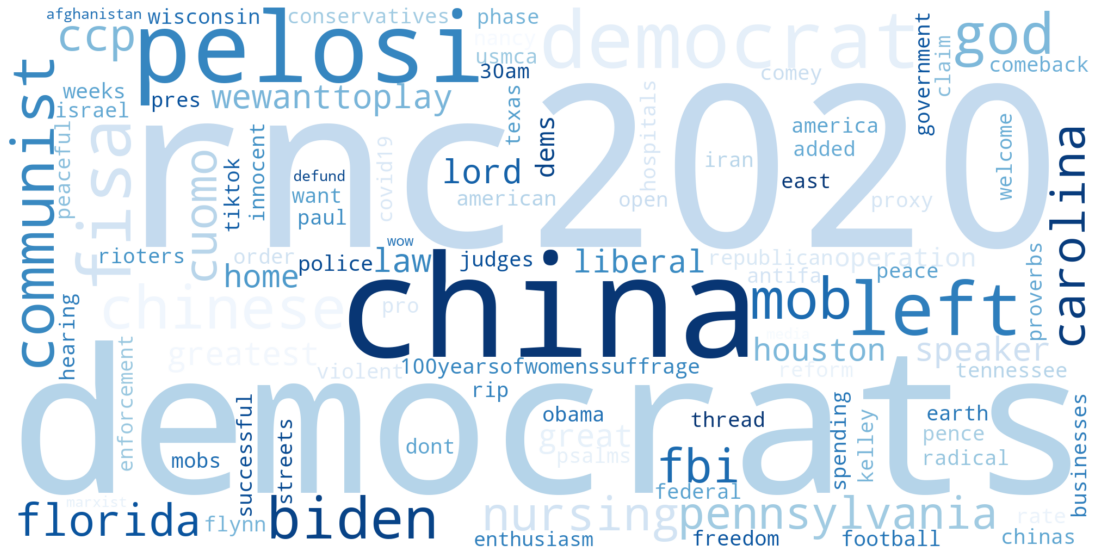

In [401]:
# Creating a loop to get the frequencies then passing it into the Wordcloud generate_from_frequencies function
w = {}
for a, x in results1.values:
    w[a] = x

import matplotlib.pyplot as plt
from wordcloud import WordCloud

wordcloud = WordCloud(width=2000, height=1000, max_words=100, background_color='white', colormap='Blues')
wordcloud.generate_from_frequencies(frequencies=w)
plt.figure(figsize=(20,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [244]:
results1

,tokens,coef
0,demconvention,-4.470369
1,donald,-3.779866
2,democracy,-3.325620
3,climate,-2.615016
4,build,-2.562115
...,...,...
3649,democrat,3.094429
3650,pelosi,3.400483
3651,china,3.759305
3652,democrats,4.359027


In [245]:
# Creating another copy
results2 = results1.copy()

In [246]:
# Replacing the coeffs column with inverse values so that I can make a wordcloud for the Democrats as well
results2['coef'] = results1['coef']*-1

In [247]:
# Check
results2

,tokens,coef
0,demconvention,4.470369
1,donald,3.779866
2,democracy,3.325620
3,climate,2.615016
4,build,2.562115
...,...,...
3649,democrat,-3.094429
3650,pelosi,-3.400483
3651,china,-3.759305
3652,democrats,-4.359027


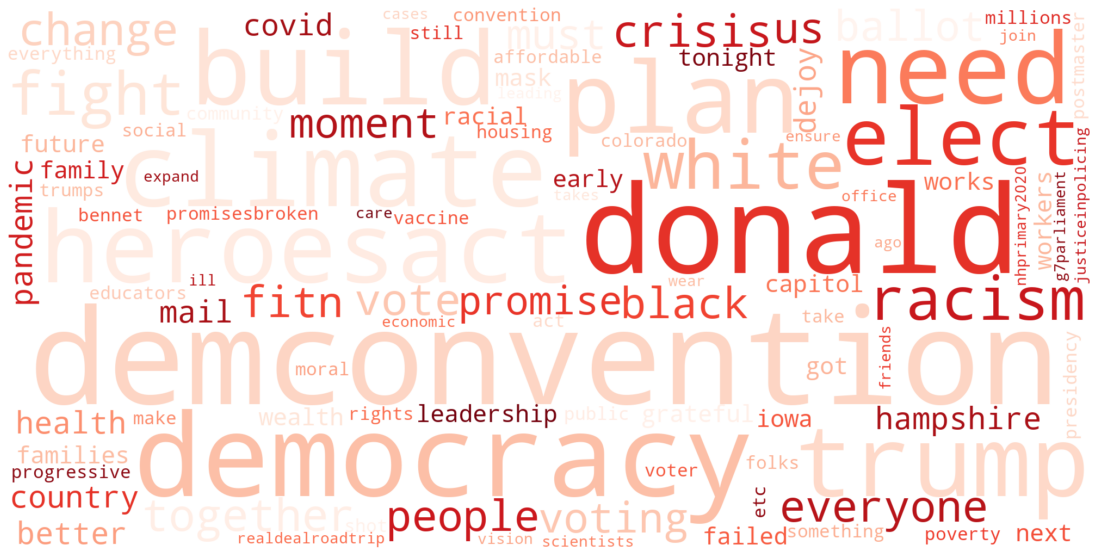

In [260]:
e = {}
for a, x in results2.values:
    e[a] = x

wordcloud2 = WordCloud(width=2000, height=1000, max_words=100, background_color='white', colormap='Reds')
wordcloud2.generate_from_frequencies(frequencies=e)
plt.figure(figsize=(20,10))
plt.imshow(wordcloud2, interpolation="bilinear")
plt.axis("off")
plt.show()


In [371]:
# Trying another model to see if there is any information in the dummy variables
X2 = dfnlp2.drop(['Is Republican','Tweet Text', 'Tweet Text P1', 'Tweet Text P2'], axis=1)
y2 = dfnlp2['Is Republican']

# Split into training & test sets
X_train1, X_test1, y_train1, y_test1 = train_test_split(X2, y2, test_size=0.25, random_state=9)

In [386]:
# Check
X_test1

,AOC,BernieSanders,DanCrenshawTX,GOP,GOPLeader,Jim_Jordan,JoeBiden,JohnDelaney,KamalaHarris,LindseyGrahamSC,...,Mike_Pence,PeteButtigieg,RandPaul,SteveScalise,TheDemocrats,amyklobuchar,ewarren,marcorubio,tedcruz,Tweet Text P3
1706,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,Speaking with Brian on Fox News Radio at :05am today. LISTEN LIVE:
8873,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,"John Lewis never lost faith that this country could be better, if only we put in the work. He never gave up on justice. He never stopped marching toward freedom. We will miss him dearly. To honor his life and carry on his legacy, we must not quit."
3392,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,I joined & in supporting #JUSTICEAct It's time we restore faith in ou
5517,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,"Make a plan to vote now, and help your loved ones do so, too. Its never too early."
4211,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,"The last couple days have been pretty shocking. Nancy Pelosi would rather call Republicans murderers than work with us to improve policing. Every attempt to work on common sense, bipartisan reforms was blocked. Why? Because it isnt about police reform, its about November."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Trump Victory Fellow & Campus Team Leader Carson is teaching his classmate Caleb how to canvas with for Rep
8592,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,Did Donald Trump just congratulate Pence for his work on Corona Virus? Did he just take a bow to Republican applause for dead?
2264,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,"For they are a nation devoid of reason,having no understanding. If they had insight they would realize this, they would understand their end Deuteronomy :28-29"
8453,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,"Harvey Milk was a man of extraordinary vision and tenacity, who challenged us all to fight for a better future for the LGBTQ community & all Americans. His relentless optimism remains an inspiration as we confront this unprecedented crisis. #HarveyMilkDay"


In [395]:
# This loop that took forever to write will do the same as the above loop however this time it
# will try to also gain some information from the dummy variables
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
ENGLISH_STOP_WORDS = stopwords.words('english')

stemmer = nltk.stem.PorterStemmer()


def my_tokenizer(sentence):
    return [stemmer.stem(token) for token in sentence.split(' ')]


# let's collect all the vectorizers we would like to try
# mix in BOW and tf-idf, stop word removal and stemming
vectorizer_dict = {"CountVecNoStemorStop": CountVectorizer(min_df=5),
                   "CountVecNoStem_Stop": CountVectorizer(min_df=5, stop_words=ENGLISH_STOP_WORDS),
                   "CountVecNoStop_Stem": CountVectorizer(min_df=5, tokenizer=my_tokenizer),
                   "CountVecStop&Stem": CountVectorizer(min_df=5, tokenizer=my_tokenizer, stop_words=ENGLISH_STOP_WORDS),
                   "TF-idfNoStemorStop": TfidfVectorizer(min_df=5),
                   "TF-idfNoStem_Stop": TfidfVectorizer(min_df=5, stop_words=ENGLISH_STOP_WORDS),
                   "TF-idfNoStop_Stem": TfidfVectorizer(min_df=5, tokenizer=my_tokenizer),
                   "TF-idfStop&Stem": TfidfVectorizer(min_df=5, tokenizer=my_tokenizer, stop_words=ENGLISH_STOP_WORDS)

                   }

# storing our experiment results in a dataframe
results_df2 = pd.DataFrame(index=vectorizer_dict.keys(), 
                          columns=["Training Accuracies", "Test Accuracies", "No. of Features"])


# loop over the vectorizers
for name, vectorizer in vectorizer_dict.items():
    # fit
    vectorizer.fit(X_train1['Tweet Text P3'])
    # transform
    X_train_sparse = vectorizer.transform(X_train1['Tweet Text P3'])
    X_test_sparse = vectorizer.transform(X_test1['Tweet Text P3'])
    
    X_train_dense = X_train_sparse.todense()
    X_test_dense = X_test_sparse.todense()
    
    X_train_df = pd.DataFrame(X_train_dense, columns = vectorizer.get_feature_names()).reset_index(drop=True)
    X_test_df = pd.DataFrame(X_test_dense, columns = vectorizer.get_feature_names()).reset_index(drop=True)
    
    X_train_final = pd.concat([X_train1.drop('Tweet Text P3', axis = 1).reset_index(drop=True), X_train_df], axis = 1)
    X_test_final = pd.concat([X_test1.drop('Tweet Text P3', axis = 1).reset_index(drop=True), X_test_df], axis = 1)
    
    # fit the model
    lr_model = LogisticRegression(C=1)
    lr_model.fit(X_train_final, y_train1)
    
    # evaluate the model on the transformed data
    results_df2.loc[name, "Training Accuracies"] = lr_model.score(X_train_final, y_train1)
    results_df2.loc[name, "Test Accuracies"] = lr_model.score(X_test_final, y_test1)
    
    # store number of features
    results_df2.loc[name, "No. of Features"] = X_train_final.shape[1]

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\chadh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [397]:
display(results_df2.apply(pd.to_numeric).style.background_gradient(cmap='Blues', 
                                                                  axis=0, 
                                                                  subset = ["Training Accuracies", "Test Accuracies"]))

,Training Accuracies,Test Accuracies,No. of Features
CountVecNoStemorStop,1.000000,1.000000,3806
CountVecNoStem_Stop,1.000000,1.000000,3675
CountVecNoStop_Stem,1.000000,1.000000,3681
CountVecStop&Stem,1.000000,1.000000,3565
TF-idfNoStemorStop,1.000000,1.000000,3806
TF-idfNoStem_Stop,1.000000,1.000000,3675
TF-idfNoStop_Stem,1.000000,1.000000,3681
TF-idfStop&Stem,1.000000,1.000000,3565


Train and test accuracies of 100%?!?! Something is definetely wrong here and with how long this loop took to write, I am very unimpressed to say the least!

In [399]:
# Taking a look to see if there is something I missed
X_train1.corr()

,AOC,BernieSanders,DanCrenshawTX,GOP,GOPLeader,Jim_Jordan,JoeBiden,JohnDelaney,KamalaHarris,LindseyGrahamSC,...,MichaelBennet,Mike_Pence,PeteButtigieg,RandPaul,SteveScalise,TheDemocrats,amyklobuchar,ewarren,marcorubio,tedcruz
AOC,1.000000,-0.047741,-0.048416,-0.047401,-0.048483,-0.047809,-0.048080,-0.049084,-0.048684,-0.048349,...,-0.047741,-0.048349,-0.047945,-0.046921,-0.047673,-0.047537,-0.047809,-0.048282,-0.049216,-0.049875
BernieSanders,-0.047741,1.000000,-0.047349,-0.046356,-0.047414,-0.046755,-0.047020,-0.048002,-0.047611,-0.047283,...,-0.046689,-0.047283,-0.046888,-0.045886,-0.046622,-0.046489,-0.046755,-0.047217,-0.048131,-0.048775
DanCrenshawTX,-0.048416,-0.047349,1.000000,-0.047011,-0.048085,-0.047416,-0.047685,-0.048680,-0.048284,-0.047952,...,-0.047349,-0.047952,-0.047550,-0.046535,-0.047281,-0.047146,-0.047416,-0.047885,-0.048812,-0.049465
GOP,-0.047401,-0.046356,-0.047011,1.000000,-0.047076,-0.046422,-0.046684,-0.047659,-0.047271,-0.046946,...,-0.046356,-0.046946,-0.046553,-0.045559,-0.046290,-0.046158,-0.046422,-0.046881,-0.047788,-0.048428
GOPLeader,-0.048483,-0.047414,-0.048085,-0.047076,1.000000,-0.047482,-0.047751,-0.048748,-0.048351,-0.048018,...,-0.047414,-0.048018,-0.047616,-0.046599,-0.047347,-0.047212,-0.047482,-0.047951,-0.048879,-0.049534
Jim_Jordan,-0.047809,-0.046755,-0.047416,-0.046422,-0.047482,1.000000,-0.047087,-0.048070,-0.047678,-0.047350,...,-0.046755,-0.047350,-0.046954,-0.045951,-0.046688,-0.046555,-0.046821,-0.047284,-0.048200,-0.048845
JoeBiden,-0.048080,-0.047020,-0.047685,-0.046684,-0.047751,-0.047087,1.000000,-0.048342,-0.047948,-0.047618,...,-0.047020,-0.047618,-0.047220,-0.046212,-0.046953,-0.046819,-0.047087,-0.047552,-0.048472,-0.049121
JohnDelaney,-0.049084,-0.048002,-0.048680,-0.047659,-0.048748,-0.048070,-0.048342,1.000000,-0.048950,-0.048613,...,-0.048002,-0.048613,-0.048206,-0.047177,-0.047933,-0.047796,-0.048070,-0.048545,-0.049485,-0.050147
KamalaHarris,-0.048684,-0.047611,-0.048284,-0.047271,-0.048351,-0.047678,-0.047948,-0.048950,1.000000,-0.048217,...,-0.047611,-0.048217,-0.047814,-0.046792,-0.047543,-0.047407,-0.047678,-0.048150,-0.049082,-0.049739
LindseyGrahamSC,-0.048349,-0.047283,-0.047952,-0.046946,-0.048018,-0.047350,-0.047618,-0.048613,-0.048217,1.000000,...,-0.047283,-0.047885,-0.047485,-0.046470,-0.047216,-0.047081,-0.047350,-0.047819,-0.048744,-0.049396


Oof! I made a grave mistake spending time to write this loop. The dummy variables provide TOO MUCH information to the model. Something I shouldve realized that these twitter handles would obviously be highly correlated to the target variable - DUH!